In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time 

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau[:len(Lx_err)]):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
nwpCorrData = pickle.load(open('nwp2DcorrData.p', 'rb'))
possibleScales = nwpCorrData['possibleScales']; temperatures = nwpCorrData['temperatures']
nwpLcorrEnw_data = nwpCorrData['LcorrEnw_data']; nwpLtauEnw_data = nwpCorrData['LtauEnw_data']
nwpLcorrMdata = nwpCorrData['LcorrMdata']; nwpLtauMdata = nwpCorrData['LtauMdata']
nwpLcorr_neg_data = nwpCorrData['Lcorr_neg_data']; nwpLtau_neg_data = nwpCorrData['Ltau_neg_data']
nwpLcorr_nwe_data = nwpCorrData['Lcorr_nwe_data']; nwpLtau_nwe_data = nwpCorrData['Ltau_nwe_data']

CorrData = pickle.load(open('2DcorrData.p', 'rb'))
IpossibleScales = CorrData['possibleScales']; Itemperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
LcorrNEGdata = CorrData['LcorrNEGdata']; LtauNEGdata = CorrData['LtauNEGdata']
LcorrEnw_data = CorrData['LcorrEnw_data']; LtauEnw_data = CorrData['LtauEnw_data']
Lcorr_neg_data = CorrData['Lcorr_neg_data']; Ltau_neg_data = CorrData['Ltau_neg_data']
Lcorr_nwe_data = CorrData['Lcorr_nwe_data']; Ltau_nwe_data = CorrData['Ltau_nwe_data']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(possibleScales,IpossibleScales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [4]:
tauData = [['','MAXtauEnw', 'MAXtauM']]

for i,L in enumerate(possibleScales):
    row = []
    tauEnw = round(np.nanmax(nwpLtauEnw_data[i]),3); tauM = round(np.nanmax(nwpLtauMdata[i]),3)
    j = np.nanargmax(nwpLtauEnw_data[i]); k = np.nanargmax(nwpLtauMdata[i])
    T1 = temperatures[j]; T2 = temperatures[k]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauEnw,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData))))

tau_negData = [['','MAXtau_neg0', 'MAXtau_neg1', 'Maxtau_neg2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_neg_ls = np.nanmax(nwpLtau_neg_data[i],axis=0); qs = np.nanargmax(nwpLtau_neg_data[i],axis=0)
    for tau_neg_l,q in zip(tau_neg_ls,qs):
        T3 = temperatures[q]; row.append('%.1f (T=%.2f)'%(tau_neg_l,T3))
    tau_negData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_negData))))

tau_nweData = [['','MAXtau_nwe0', 'MAXtau_nwe1', 'Maxtau_nwe2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_nwe_ls = np.nanmax(nwpLtau_nwe_data[i],axis=0); rs = np.nanargmax(nwpLtau_nwe_data[i],axis=0)
    for tau_nwe_l,r in zip(tau_nwe_ls,rs):
        T4 = temperatures[r]; row.append('%.1f (T=%.2f)'%(tau_nwe_l,T4))
    tau_nweData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_nweData))))

L = 8


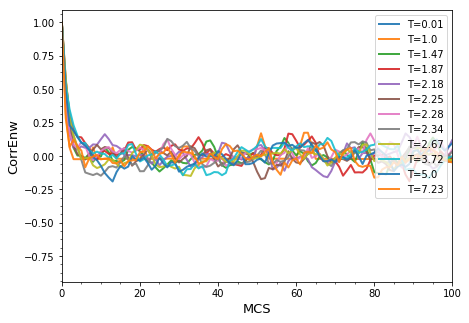

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(nwpLcorrEnw_data[0][0]))
i = 0 # index of scales
k = 0 # index of temperature
step = 3

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,nwpLcorrEnw_data[i][j*step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('MCS',fontsize=13); ax1.set_ylabel('CorrEnw', fontsize=13)
ax1.legend()
ax1.set_xlim([0,100])
ax1.minorticks_on()

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauEnw[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])
if save:
    plt.savefig('nwpRG2DcorrEnw_vs_t')

# Energy Function

In [6]:
nwpLdata = pickle.load(open('nwp2Dfinite_size_scaling_data.p', 'rb'))
nwpLen_nw_data = nwpLdata['Len_nw_data']; nwpLen_nw_err = nwpLdata['Len_nw_err']; nwpL_CvEnw_data = nwpLdata['L_CvEnw_data']
nwpLneg_data = nwpLdata['Lneg_data']; nwpLneg_err = nwpLdata['Lneg_err']; nwpLnwe_data = nwpLdata['Lnwe_data']
nwpLnwe_err = nwpLdata['Lnwe_err']; nwpL_Cv_neg_data = nwpLdata['L_Cv_neg_data']; nwpL_Cv_nwe_data = nwpLdata['L_Cv_nwe_data']
temperatures = nwpLdata['temperatures']; scales = nwpLdata['scales'];  t_prod = nwpLdata['t_prod']

Ldata = pickle.load(open('2Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; L_CvEdata = Ldata['L_CvEdata']
L_NEGdata = Ldata['L_NEGdata']; L_NEGerr = Ldata['L_NEGerr']; L_CvNEGdata = Ldata['L_CvNEGdata']
Len_nw_data = Ldata['Len_nw_data']; Len_nw_err = Ldata['Len_nw_err']; L_CvEnw_data = Ldata['L_CvEnw_data']
Lneg_data = Ldata['Lneg_data']; Lneg_err = Ldata['Lneg_err']; L_Cv_neg_data = Ldata['L_Cv_neg_data']
Lnwe_data = Ldata['Lnwe_data']; Lnwe_err = Ldata['Lnwe_err']; L_Cv_nwe_data = Ldata['L_Cv_nwe_data']
Itemperatures = Ldata['temperatures']; Iscales = Ldata['scales']; It_prod = Ldata['t_prod']

print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

results with network probability were gathered from the following number of sampled configurations: 10000
results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
nwpLen_nw_terr = uncorr_err(nwpLen_nw_err, nwpLtauEnw_data); Len_terr = uncorr_err(Len_err, LtauEdata)
print(nwpLen_nw_terr)
print(Len_terr)

[[ 0.          0.          1.02867386  2.51426669  3.64171511  4.38769931
   5.04017509  5.64864908  6.27712526  6.79796988  7.36531519  7.77029748
   7.99684923  8.11259472  8.15758831  8.14448587  8.19347401  8.28476705
   8.30695756  8.30377168  8.36227726  8.44440832  8.58058343  8.76771045
   9.27676223  9.73434991 10.30188068 10.73953046 11.09797867 11.16471554
  11.03970142 10.89723719 10.47691692 10.12797307  9.89147878]
 [ 0.          0.          1.63015751  3.72025713  5.33582182  6.32200297
   7.28128731  8.15441593  9.0261432   9.95425099 10.77636339 11.32993635
  11.68097524 11.77366709 12.03796479 11.94008696 12.09515773 12.07120791
  11.99945811 12.22486127 12.11082237 12.38146955 12.54499309 12.88447448
  13.50766073 14.34862944 14.82882445 15.67117446 16.11549586 16.40562884
  16.3789094  16.10256143 15.30375732 14.753115   14.35077076]
 [ 0.          0.          2.1591397   5.93647431  8.23438143  9.79580424
  11.2951868  12.89132305 14.22471539 15.54351444 16.6343208

##### Finite size scaling

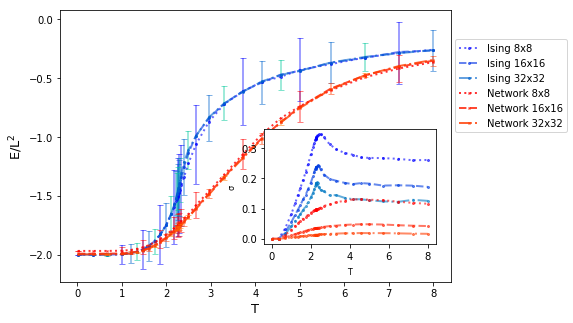

In [8]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/L^2}$', fontsize=13)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.23, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

geom = 4/3

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=2, alpha=0.6, label='Ising %dx%d'%(L,L), 
             color=cm.winter(i*50), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], Len_data[i][i:]/(L**2), yerr=Len_terr[i][i:]/(L**2), alpha=0.5, color=cm.winter(i*100), 
                 linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/(L**2),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), 
             color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, nwpLen_nw_data[i]/(geom*(L**2)), marker='x',markersize=2, alpha=0.8, label='Network %dx%d'%(L,L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], nwpLen_nw_data[i][i:]/(geom*(L**2)), yerr=nwpLen_nw_terr[i][i:]/(geom*(L**2)), alpha=0.5, 
                 color=cm.autumn(i*60), linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, nwpLen_nw_terr[i]/(geom*(L**2)),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[1.01,0.55]); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwpRG2D_L_E_Enw_vs_T')

In [9]:
LrEnwE = (np.array(nwpLen_nw_data))/(np.array(Len_data[:1]))
print(LrEnwE)

[[ 1.3125      1.3125      1.31250844  1.31286696  1.31421162  1.31639979
   1.32091095  1.32845689  1.34112044  1.3621914   1.39732446  1.44449234
   1.48056807  1.51678137  1.53356236  1.54343369  1.55807124  1.55900012
   1.57092764  1.57445377  1.59160067  1.6183955   1.6818911   1.80674539
   1.98021099  2.24378001  2.44124991  2.49611846  2.45719388  2.29622664
   2.29371982  2.11109834  2.02578993  1.95071873  1.87825152]
 [ 5.3125      5.3125      5.31247344  5.31357287  5.31878454  5.33068187
   5.34857536  5.38119719  5.43469959  5.51830382  5.66342025  5.84699878
   6.00394515  6.13957851  6.19561849  6.22807539  6.27986033  6.29642714
   6.34991437  6.36846252  6.45262419  6.56891932  6.82841369  7.31499355
   8.04206736  9.09499263  9.91092113 10.1683977  10.17232146  9.54645853
   9.25756298  8.24801288  7.84034381  7.53006398  7.26480077]
 [21.3125     21.3125     21.31280845 21.31595531 21.34252526 21.3897297
  21.4580164  21.5788926  21.79846132 22.13604466 22.73509459

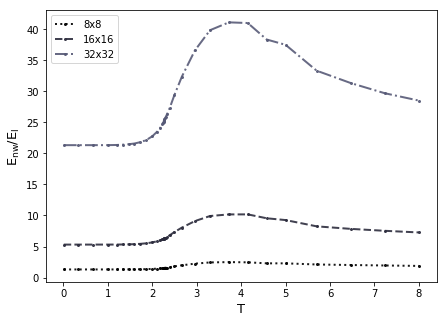

In [10]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E_{nw}/E_I}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrEnwE[i], marker='o', markersize=2, alpha=0.9, label='%dx%d'%(L,L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

    
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwpRG2D_LrEnwE_vs_T')

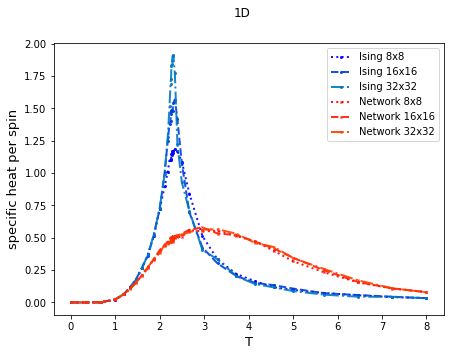

In [11]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)#; ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('specific heat per spin', fontsize=13)#, color='orange')
#ax12.set_ylabel('Network specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-']

geom = 1#4/3

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/(L**2), marker='o', markersize=2, alpha=0.9, label='Ising %dx%d'%(L,L), 
              color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):   
    ax11.plot(temperatures, nwpL_CvEnw_data[i]/(geom*(L**2)), marker='x',markersize=2, alpha=0.9, label='Network %dx%d'%(L,L), color=cm.autumn(i*30),
              linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper right')
#ax12.legend(loc='center right')

if save:
    plt.savefig('nwpRG2D_L_CvE_CvEnw_vs_T')

##### RG energy ~ inner edges

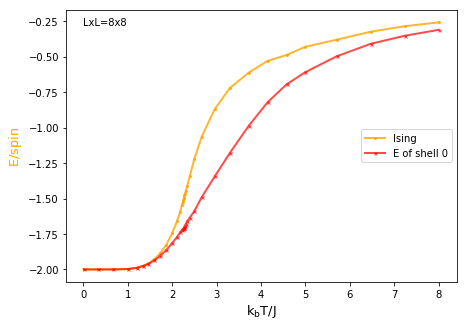

In [12]:
save = False
Lidx  = 0 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
step = 3

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/(L**2), marker='o', markersize=2, alpha=0.8, label='Ising', color='orange', 
             linestyle=ls[0], linewidth=2)
for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, nwpLnwe_data[Lidx][:,i]/(n_l[i]**2), marker='x', markersize=3, alpha=0.7, label='E of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
#ax2.legend(loc='lower right')
ax1.annotate('LxL=%dx%d'%(L,L), (0,-0.28))

if save:
    plt.savefig('nwpRG2D_Enwe_vs_T_LxL=%dx%d'%(L,L))

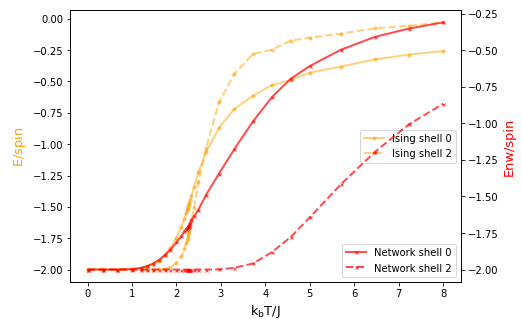

In [13]:
save = False
Lidx  = 0 # scale index
L = scales[Lidx]
nRGsteps = len(nwpLneg_data[Lidx][0,:])
step = 2

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ax2.set_ylabel('Enw/spin', fontsize=13, color='r')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = (L)/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/(n_l[i]**2), marker='o', markersize=3, alpha=0.5, label='Ising shell %d'%(i), 
             color='orange', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, nwpLnwe_data[Lidx][:,i]/(n_l[i]**2), marker='x',markersize=3, alpha=0.7, label='Network shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax2.legend(loc='lower right')
ax1.annotate('LxL=%dx%d'%(L,L), (0,0.1))

if save:
    plt.savefig('nwpRG2D_nwe_vs_T_LxL=%dx%d'%(L,L))

##### Magnetization

In [14]:
nwpLdata_mag = pickle.load(open('nwp2Dfinite_size_scaling_data_mag.p', 'rb'))
nwpLmag_data= nwpLdata_mag['Lmag_data']; nwpLmag_err = nwpLdata_mag['Lmag_err']; nwpLsusc_data = nwpLdata_mag['Lsusc_data']
temperatures = nwpLdata_mag['temperatures']; scales = nwpLdata_mag['scales']

Ldata_mag = pickle.load(open('2Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
Itemperatures = Ldata_mag['temperatures']; Iscales = Ldata_mag['scales']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [15]:
nwpLmag_terr = uncorr_err(nwpLmag_err, nwpLtauMdata); Lmag_terr = uncorr_err(Lmag_err, LtauMdata)
print(nwpLmag_terr)
print(Lmag_terr)

[[ 0.          0.          0.55750019  1.37885055  2.01103005  2.47010804
   2.88204103  3.266118    3.66878818  4.02609322  4.41666031  4.71615264
   4.89321485  4.98313231  5.00796551  4.99539004  5.01606011  5.10294804
   5.11037386  5.11383545  5.15715433  5.22450349  5.32959488  5.51100263
   5.93047801  6.35073999  6.94551695  7.61407052  8.22878067  8.38722656
   8.47541347  8.3839217   8.05165587  7.70666069  7.46159653]
 [ 0.          0.          1.08951763  2.51703345  3.66234564  4.3943577
   5.10647965  5.76635518  6.51498559  7.25951118  7.96750377  8.4658458
   8.76416218  8.88925807  9.12906761  9.02900915  9.19232078  9.16044424
   9.14154898  9.29264942  9.19793907  9.44755182  9.64929077  9.96623605
  10.6571595  11.59090748 12.37585677 13.70332645 14.75372338 16.07226765
  17.05687607 17.65694724 16.66271386 15.90750483 15.05878401]
 [ 0.          0.          2.48848179  6.93198979  9.76210278 11.71037913
  13.65966904 15.7992326  17.68186146 19.56625384 21.21661078 

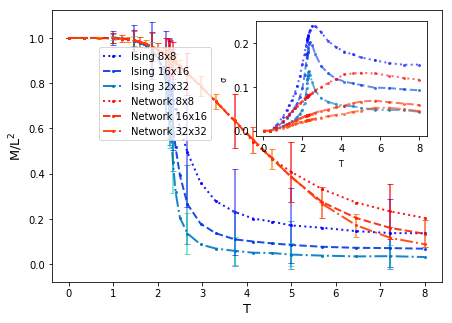

In [16]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L^2}$', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.53, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

geom = 4/3

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/(L**2), marker='o', markersize=2, alpha=0.9, label='Ising %dx%d'%(L,L), 
             color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures, Lmag_data[i]/(L**2), yerr=Lmag_terr[i]/(L**2), alpha=0.6, color=cm.winter(i*100), linestyle='', 
                 capsize=3, errorevery=3)
    ax3.plot(temperatures[i:], Lmag_terr[i][i:]/(L**2),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), 
             color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales):
    ax1.plot(temperatures, nwpLmag_data[i]/(L**2), marker='o', markersize=2, alpha=0.9, label='Network %dx%d'%(L,L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], nwpLmag_data[i][i:]/(L**2), yerr=nwpLmag_terr[i][i:]/(L**2), alpha=0.8, 
                 color=cm.autumn(i*60), linestyle='', capsize=3, errorevery=3)
    ax3.plot(temperatures, nwpLmag_terr[i]/(L**2),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[0.12,0.52])

if save:
    plt.savefig('nwpRG2D_L_M_vs_T')

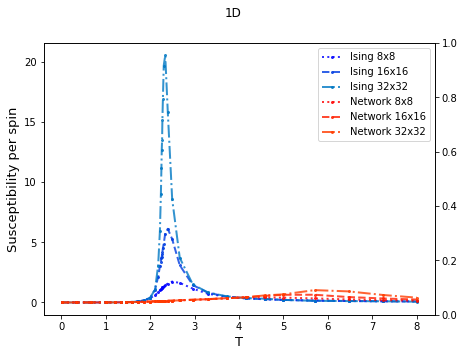

In [17]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/(L**2), marker='o', markersize=2, alpha=0.8, label='Ising %dx%d'%(L,L), 
              color=cm.winter(i*60), linestyle=ls[i], linewidth=2)

for i,L in enumerate(scales):
    ax11.plot(temperatures, nwpLsusc_data[i]/(L**2), marker='o', markersize=2, alpha=0.8, label='Network %dx%d'%(L,L), 
              color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)

ax11.legend()

if save:
    plt.savefig('nwpRG2Dsusc_vs_T')

# Free Energy

In [18]:
nwpLf_data = pickle.load(open('nwp2Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = nwpLf_data['f_exact']; Len_nw_fr = nwpLf_data['Len_nw_fr']; Len_nwS = nwpLf_data['Len_nwS'] 
Len_nw_data = nwpLf_data['Len_nw_data'] ; Len_nw_err = nwpLf_data['Len_nw_err'] 
Len_nw_hist_data = nwpLf_data['Len_nw_hist_data']; Len_nw_bin_edges_data = nwpLf_data['Len_nw_bin_edges_data']
temperatures = nwpLf_data['temperatures']; scales = nwpLf_data['scales']; t_prod = nwpLf_data['t_prod']

Lf_data = pickle.load(open('2Dfree_energy_finite_size_scaling.p', 'rb'))
Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']; Len_err = Lf_data['Len_err']; 
Itemperatures = Lf_data['temperatures']; Iscales= Lf_data['scales']; It_prod = Lf_data['t_prod'] 

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')
    
print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

results with network probability were gathered from the following number of sampled configurations: 20000
results for the regular Ising model were gathered from the following number of sampled configurations: 40000


In [19]:
Len_nw_fr_err = []; Len_fr_err = []

geom = 1#4/3

for i,L in enumerate(scales):
    e = abs((Len_nw_fr[i]/(geom*(L**2)))-f_exact)
    Len_nw_fr_err.append(e)
    Ie = abs((Len_fr[i]/(L**2))-f_exact)
    Len_fr_err.append(Ie)

##### Energy histograms

In [20]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/(L**2), h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/(L**2), h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/(L**2), h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/(L**2), h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

Scale=8


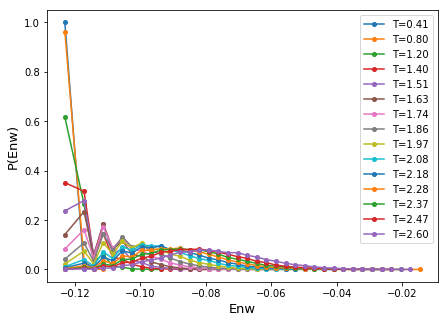

In [21]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('Enw', fontsize=13)
ax5.set_ylabel('P(Enw)', fontsize=13)

idx = 0
print('Scale=%d'%(scales[idx]))
l = 1
k = 15
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_nw_bin_edges_data[idx][l+i]/(L**2), Len_nw_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, 
             linestyle='-',  marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('nwpRG2Den_nw_hist_%d_%d'%(l,k))

In [22]:
print('Scale=%d'%(scales[idx]))
wg.interact(check_visual, hists=wg.fixed(Len_nw_hist_data[idx]), bins=wg.fixed(Len_nw_bin_edges_data[idx]), 
            i=(0,len(temperatures)-2))

Scale=8


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'â€¦

<function __main__.check_visual(i, hists, bins)>

##### Free Energy finite size scaling

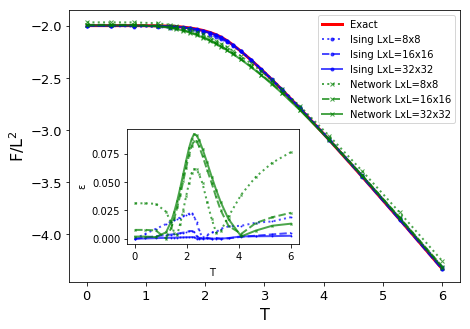

In [23]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{F/L^2}$', fontsize=16)#, color='b')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-'] #color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=1, label='Exact', color='r', linewidth=3)

left, bottom, width, height = [0.24, 0.23, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\epsilon}$', fontsize=10)

for i,L in enumerate(scales):
    ax1.plot(Itemperatures, Len_fr[i]/(L**2), marker='o', markersize=3, alpha=0.7, label='Ising LxL=%dx%d'%(L,L), 
             linestyle=ls[i], linewidth=2, color='b')
    ax3.plot(Itemperatures, Len_fr_err[i], marker='o',markersize=1, alpha=0.7, label='Ising LxL=%dx%d'%(L,L), color='b', 
            linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr[i]/(L**2), marker='x',markersize=4, alpha=0.7, label='Network LxL=%dx%d'%(L,L), 
             color='g', linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=2, alpha=0.7, label='Network %dx%d'%(L,L), color='g', 
            linestyle=ls[i], linewidth=2)
    
ax1.legend()

if save:
    plt.savefig('nwpRG2D_Len_fr_Len_nw_fr_vs_T')

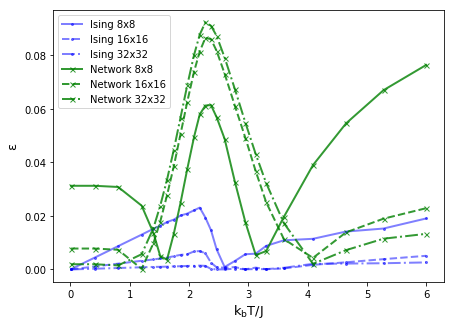

In [24]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr_err[i], marker='o', markersize=2, alpha=0.5, label='Ising %dx%d'%(L,L), 
             linestyle=ls[i], linewidth=2, color='b')
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Network %dx%d'%(L,L), color='g', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('nwpRG2D_Len_fr_err_Len_nw_fr_err_vs_T')

Entropy:

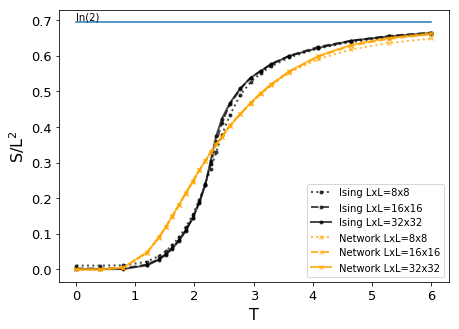

In [25]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{S/L^2}$', fontsize=16, color='black')
#ax1.set_ylim(-0.1,0.76)
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-']#color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))


for i,L in enumerate(scales):
    ax1.plot(Itemperatures, LenS[i]/(L**2), marker='o', markersize=3, alpha=0.7, label='Ising LxL=%dx%d'%(L,L), 
             linestyle=ls[i], linewidth=2, color='black') 
for i,L in enumerate(scales):    
    ax1.plot(temperatures, Len_nwS[i]/(L**2), marker='x',markersize=4, alpha=0.8, label='Network LxL=%dx%d'%(L,L), 
             color='orange', linestyle=ls[i], linewidth=2)
    #Smax = (1-(2/L))*np.log(2)
    #ax1.plot(temperatures, np.tile(Smax, len(temperatures)), c='c')

ax1.legend(loc='lower right')


if save:
    plt.savefig('nwpRG2D_LenS_Len_nwS_vs_T')